In [35]:
import pandas as pd 
import numpy as np 
from scipy.special import gamma

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [94]:
df = pd.read_table("https://www.uio.no/studier/emner/matnat/math/STK1100/data/dodssannsynlighet-felles.txt")
df = df.loc[35:]
# df = df.reindex(range(len(df)))
df.dod = df.dod / 1000
df["X"] = df.ald - 35
df["S(x)"] = np.cumprod(1 - df.dod)
df["F(x)"] = 1 - df["S(x)"]
df["p(x)"] = df["F(x)"] - df["F(x)"].shift(1)
df["h(X)"] = (1e5/1.03**32) * ( (1 - (1/1.03)**(df["X"] - 31)) / (1 - 1/1.03) )
df["h(X)"] = np.where(df.X<=31,0,df["h(X)"])
df["g(X)"] = (1 - (1/1.03)**(np.minimum(df["X"],31)+1)) / (1 - 1/1.03) 
df

,ald,dod,X,S(x),F(x),p(x),h(X),g(X)
35,35,0.001,0,0.999,0.001,nan,0.000,1.000
36,36,0.001,1,0.999,0.001,0.001,0.000,1.971
37,37,0.001,2,0.998,0.002,0.001,0.000,2.913
38,38,0.001,3,0.997,0.003,0.001,0.000,3.829
39,39,0.001,4,0.997,0.003,0.001,0.000,4.717
...,...,...,...,...,...,...,...,...
102,102,0.392,67,0.004,0.996,0.002,873262.035,21.000
103,103,0.402,68,0.002,0.998,0.001,886660.922,21.000
104,104,0.424,69,0.001,0.999,0.001,899669.550,21.000
105,105,0.279,70,0.001,0.999,0.000,912299.286,21.000


<AxesSubplot:>

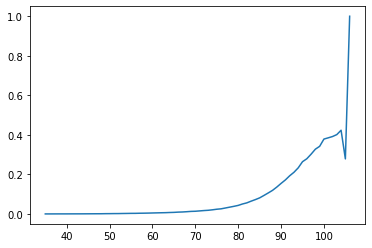

In [47]:
df["dod"].plot()

<AxesSubplot:>

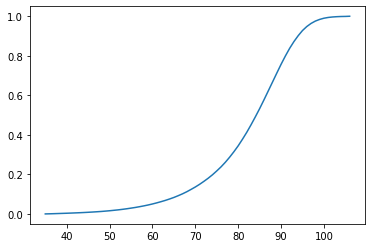

In [52]:
df["F(x)"].plot()

 Kumulativ sannsynlighetsfordeling

<AxesSubplot:>

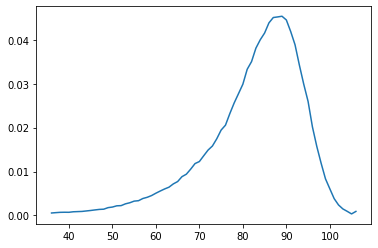

In [49]:
df["p(x)"].plot()

Punktsannsynligheten

In [50]:
x = df.ald
np.sum(x*df["p(x)"])

82.47541411346103

In [71]:
np.sum(df["h(X)"]*df["p(x)"]).round()

501512.0

Nåverdi forvented nåverdi av pensjonsutbetalingene

In [97]:
np.sum(df["g(X)"] * df["p(x)"])

20.60274483525167

 $$ E[g(X)] = 20.6 $$\
 $$ E[h(X)] = 501512 $$
 
 $$ K = \frac{E[h(X)]}{E[g(x)]} = \frac{501512}{20.6} = 24 345.24$$